# Created by - Sanjana Pal

# Problem Statement
Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('wine.csv')

In [3]:
df

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0             0.28             2.29   5.64  1.04      3.92     1065  
1             0.26             1.28   4.38  1.05      3.40     1050  
2             0.30             2.81   5.68  1.03      3.17     1185  
3             0.24             2.18   7.80  0.86      3.45     1480  
4             0.39             1.82   4.32  1.04      2.93      735  
..             ...              ...    ...   ...       ...      ...  
173           0.52             1.06   7.70  0.64      1.74      740  
174           0.43             1.41   7.30  0.70      1.56      750  
175           0.43             1.35  10.20  0.59      1.56      835  
176           0.53             1.46   9.30  0.60      1.62      840  
177           0.56             1.35   9.20  0.61      1.60      560  

[178 rows x 14 columns]

# EDA

In [4]:
df.describe()

Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.124453         0.572359    2.318286   
min      0.980000    0.340000       0.130000         0.410000    1.280000   
25%      1.742500    1.205000       0.270000         1.250000    3.220000   
50%      2.355000    2.135000       0.340000         1.555000    4.690000   
75%      2.800000    2.875000       0.437500         1.950000    6.200000   
max      3.880000    5.080000       0.660000         3.580000   13.000000   

              Hue    Dilution      Proline  
count  178.000000  178.000000   178.000000  
mean     0.957449    2.611685   746.893258  
std      0.228572    0.709990   314.907474  
min      0.480000    1.270000   278.000000  
25%      0.782500    1.937500   500.500000  
50%      0.965000    2.780000   673.500000  
75%      1.120000    3.170000   985.000000  
max      1.710000    4.000000  1680.000000

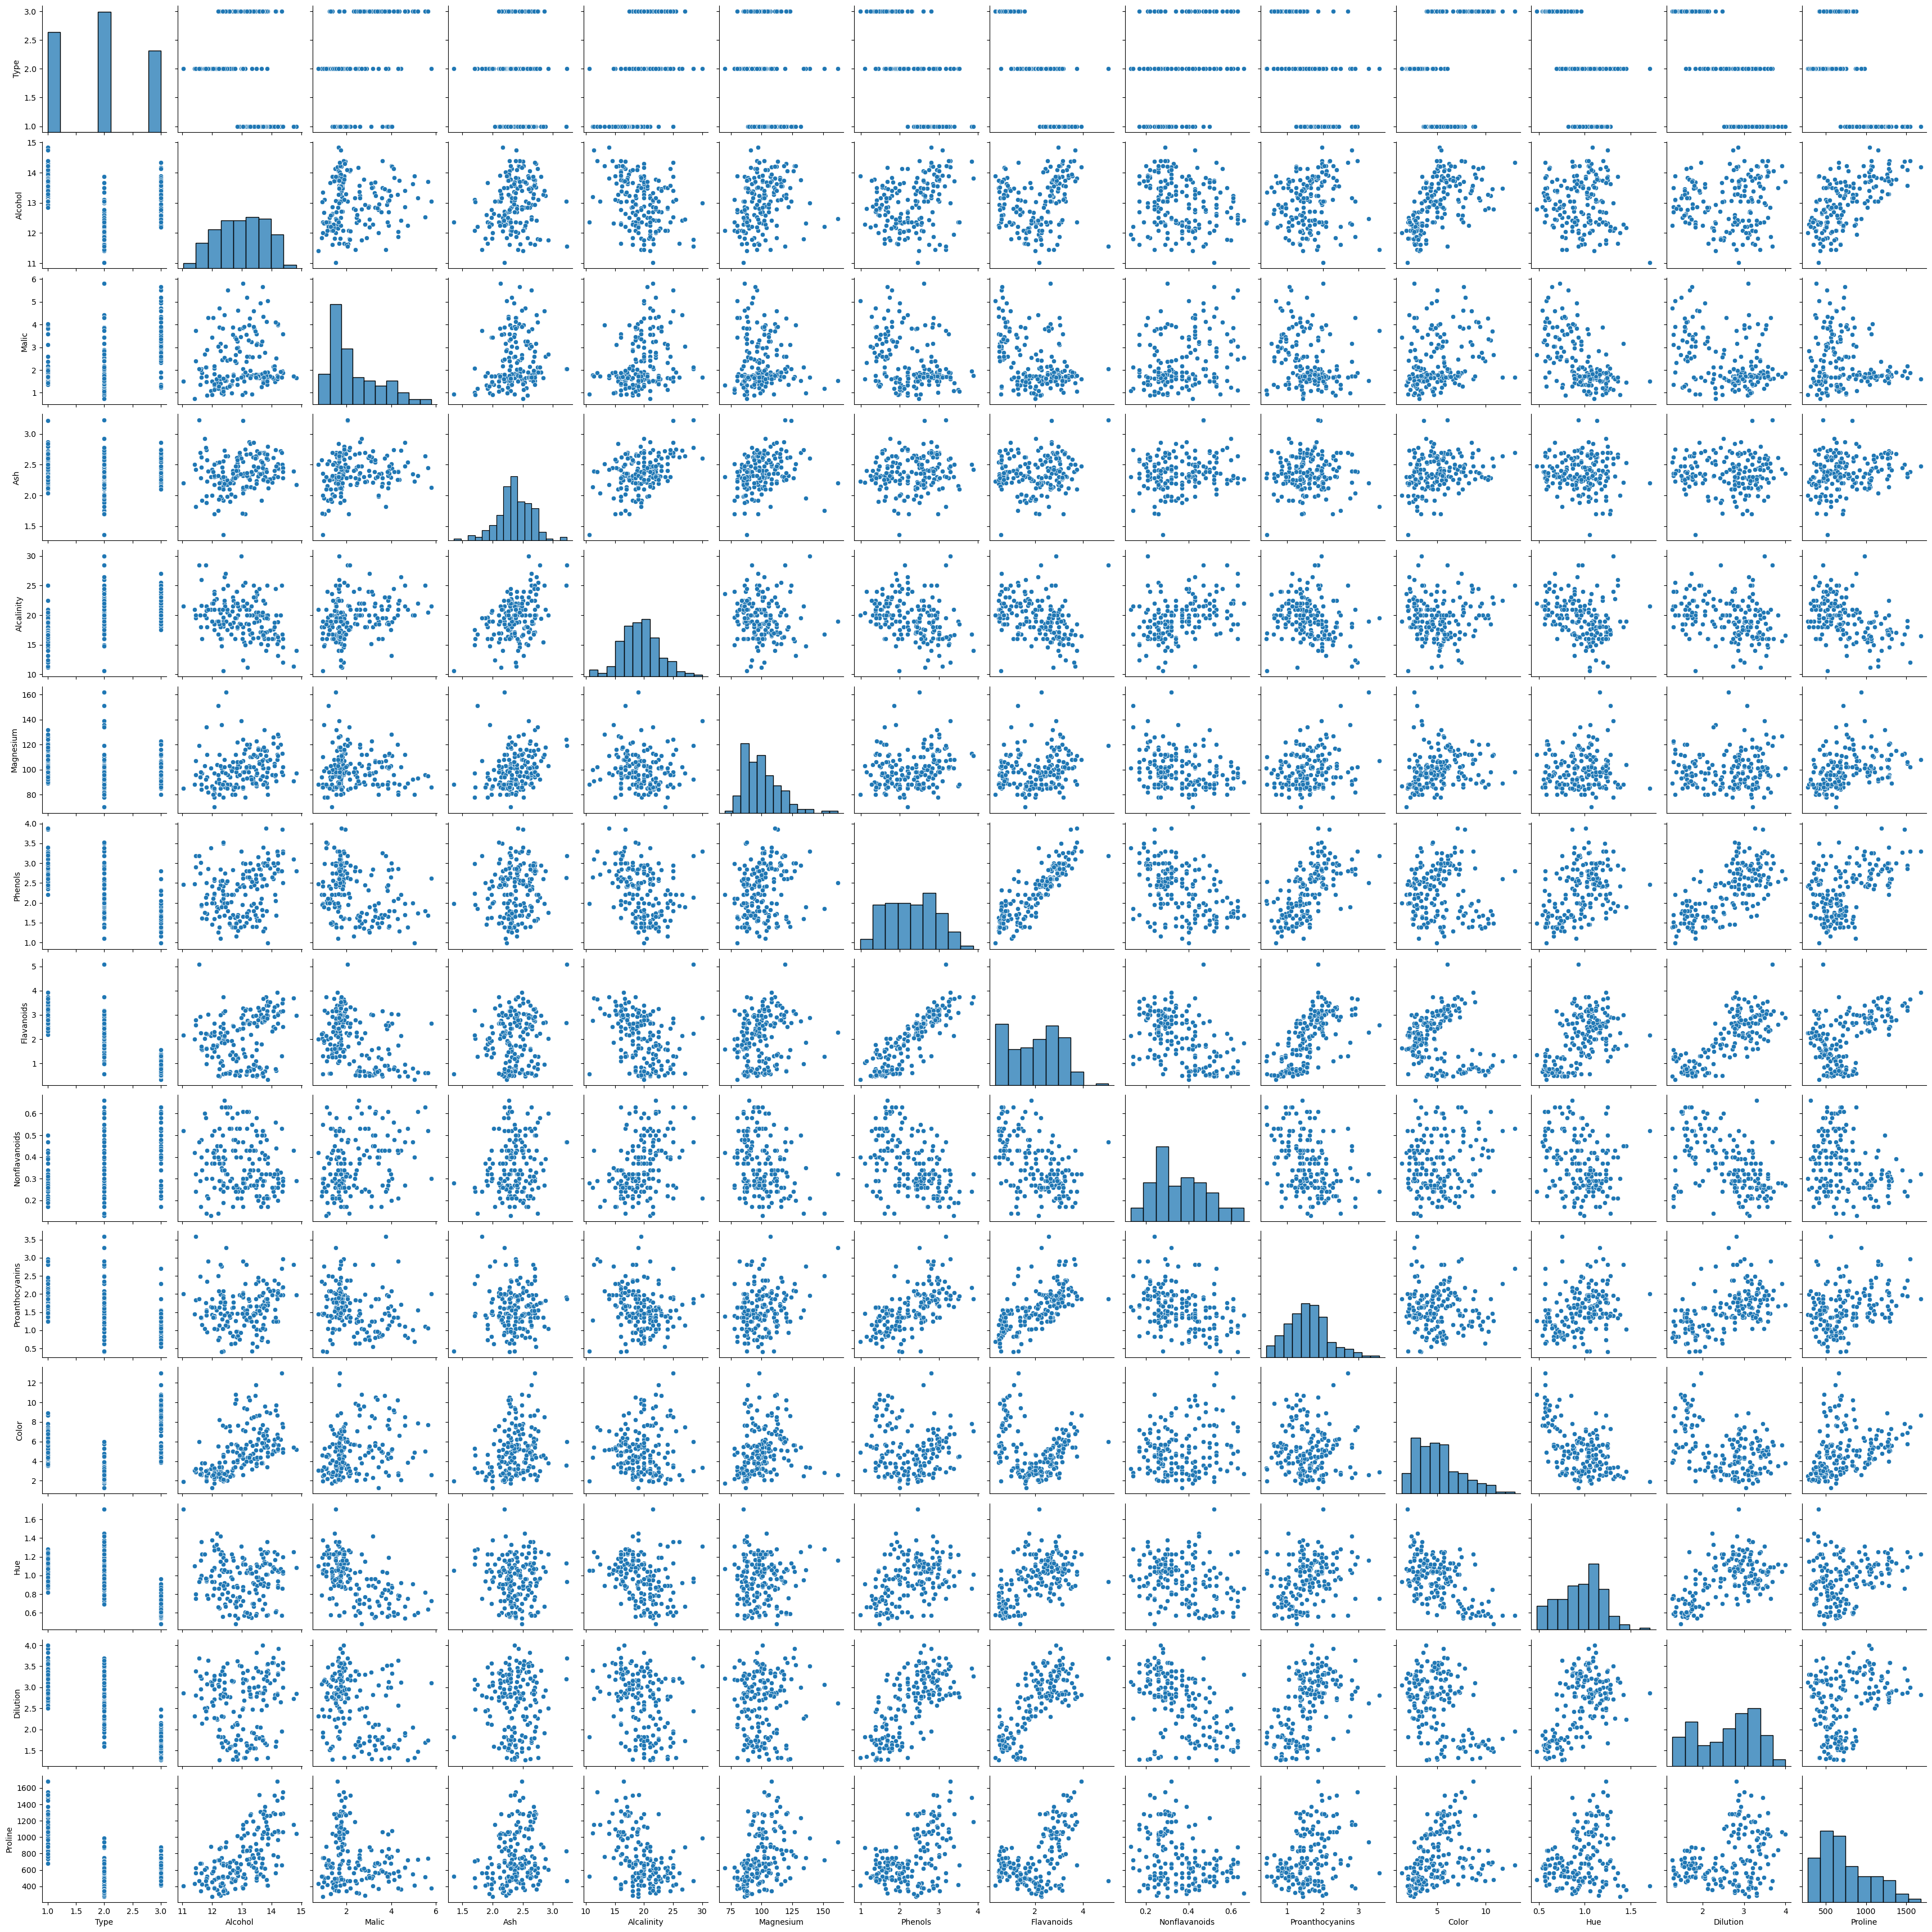

In [5]:
sns.pairplot(df)

<AxesSubplot:xlabel='Type', ylabel='count'>

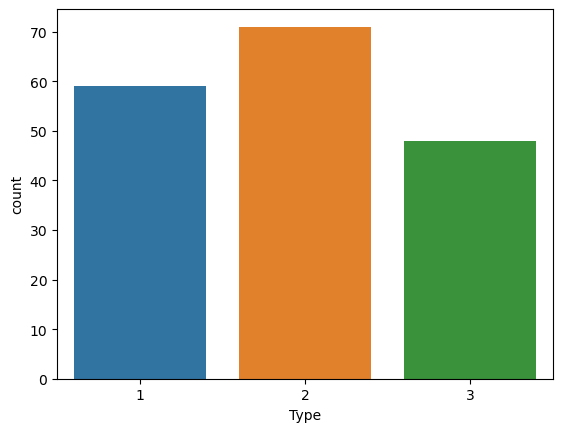

In [6]:
sns.countplot(df['Type'])

In [7]:
df.shape

(178, 14)

# Data Spliting

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [9]:
x = df.iloc[:,1:15]
y = df['Type']


In [10]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [11]:
lg = LogisticRegression()
lg.fit(xtrain,ytrain)
pred = lg.predict(xtest)

In [12]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.87      1.00      0.93        13
           3       1.00      0.89      0.94         9

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.94        36
weighted avg       0.95      0.94      0.95        36



# Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc = StandardScaler()
sc.fit_transform(x)

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

# PCA

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA()
pcs = pca.fit_transform(x)
pcs

array([[ 3.18562979e+02,  2.14921307e+01,  3.13073470e+00, ...,
         8.87340044e-02, -3.85475626e-02,  8.02644337e-02],
       [ 3.03097420e+02, -5.36471768e+00,  6.82283550e+00, ...,
         3.97781862e-02, -5.71915771e-02,  1.35927465e-02],
       [ 4.38061133e+02, -6.53730945e+00, -1.11322298e+00, ...,
         2.37770027e-01, -4.87978751e-02, -3.54081623e-02],
       ...,
       [ 8.84580737e+01,  1.87762846e+01, -2.23757651e+00, ...,
        -2.23049341e-01,  9.60485020e-02,  3.61748954e-02],
       [ 9.34562419e+01,  1.86708191e+01, -1.78839152e+00, ...,
        -3.04078323e-02, -5.20893107e-02,  1.32759078e-01],
       [-1.86943190e+02, -2.13330803e-01, -5.63050984e+00, ...,
         1.60725068e-01,  3.19201764e-02,  2.69369989e-02]])

In [17]:
pca.explained_variance_ratio_

array([9.98091230e-01, 1.73591562e-03, 9.49589576e-05, 5.02173562e-05,
       1.23636847e-05, 8.46213034e-06, 2.80681456e-06, 1.52308053e-06,
       1.12783044e-06, 7.21415811e-07, 3.78060267e-07, 2.12013755e-07,
       8.25392788e-08])

In [18]:
np.cumsum(pca.explained_variance_ratio_)

array([0.99809123, 0.99982715, 0.99992211, 0.99997232, 0.99998469,
       0.99999315, 0.99999596, 0.99999748, 0.99999861, 0.99999933,
       0.99999971, 0.99999992, 1.        ])

# Scree plot

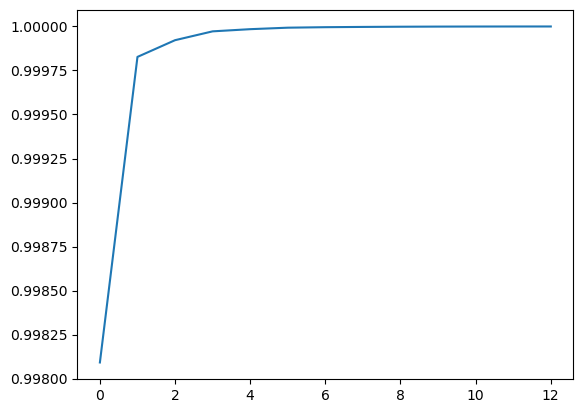

In [19]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [20]:
pca = PCA(n_components=3)
pcs = pca.fit_transform(x)
pcs = pd.DataFrame(pcs,columns=['pc1','pc2','pc3'])
pcs

pc1        pc2       pc3
0    318.562979  21.492131  3.130735
1    303.097420  -5.364718  6.822835
2    438.061133  -6.537309 -1.113223
3    733.240139   0.192729 -0.917257
4    -11.571428  18.489995 -0.554422
..          ...        ...       ...
173   -6.980211  -4.541137 -2.474707
174    3.131605   2.335191 -4.309931
175   88.458074  18.776285 -2.237577
176   93.456242  18.670819 -1.788392
177 -186.943190  -0.213331 -5.630510

[178 rows x 3 columns]

In [21]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Type, Length: 178, dtype: int64

In [22]:
pcs = pca.fit_transform(x)

In [23]:
pcs

array([[ 3.18562979e+02,  2.14921307e+01,  3.13073470e+00],
       [ 3.03097420e+02, -5.36471768e+00,  6.82283550e+00],
       [ 4.38061133e+02, -6.53730945e+00, -1.11322298e+00],
       [ 7.33240139e+02,  1.92729032e-01, -9.17257016e-01],
       [-1.15714285e+01,  1.84899946e+01, -5.54422076e-01],
       [ 7.03231192e+02, -3.32158674e-01,  9.49375334e-01],
       [ 5.42971581e+02, -1.35189666e+01,  2.12694283e+00],
       [ 5.48401860e+02,  1.14494324e+01,  4.04924202e-02],
       [ 2.98036863e+02, -8.18015784e+00,  3.88097517e+00],
       [ 2.98049553e+02, -7.10154294e+00,  1.55845533e+00],
       [ 7.63079712e+02, -8.33431723e+00, -1.88629037e+00],
       [ 5.32943228e+02, -1.42876338e+01,  1.30335240e-01],
       [ 5.72834410e+02, -2.10050143e+01,  3.72614859e-01],
       [ 4.02925358e+02, -1.61026352e+01,  5.67513986e+00],
       [ 8.00053394e+02, -1.21184472e+01,  3.04652991e+00],
       [ 5.63245578e+02,  2.21482866e+00, -5.25510985e-01],
       [ 5.33379651e+02,  1.08048022e+01

In [24]:
pe.scatter(x=pcs[:,0],y=pcs[:,1],color=y)

In [25]:
xtrain,xtest,ytrain,ytest = train_test_split(pcs,y,test_size=0.2,random_state=1)

In [26]:
lg = LogisticRegression()
lg.fit(xtrain,ytrain)
pred = lg.predict(xtest)


In [27]:
pred

array([3, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 3, 2, 1, 2, 2, 3, 1, 2, 1, 1, 2,
       2, 3, 1, 3, 1, 1, 1, 3, 2, 3, 2, 1, 2, 2], dtype=int64)

In [28]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.75      0.92      0.83        13
           3       0.71      0.56      0.63         9

    accuracy                           0.83        36
   macro avg       0.82      0.80      0.81        36
weighted avg       0.84      0.83      0.83        36



# T_SNE

In [29]:
from sklearn.manifold  import TSNE

In [30]:
tsne = TSNE()
ts = tsne.fit_transform(x)
ts

array([[ -9.539066  ,  -7.3194985 ],
       [ -9.204722  ,  -7.155957  ],
       [-11.041383  ,  -8.937142  ],
       [-13.220061  , -10.7200985 ],
       [ -2.5095086 ,  -2.1195197 ],
       [-13.268293  , -10.375993  ],
       [-12.052149  , -10.008153  ],
       [-12.474753  ,  -9.570934  ],
       [ -8.738064  ,  -7.599071  ],
       [ -9.107362  ,  -7.0778065 ],
       [-13.483715  , -10.630029  ],
       [-11.863841  ,  -9.973709  ],
       [-12.374662  , -10.169     ],
       [-10.555095  ,  -8.541769  ],
       [-13.56065   , -10.769047  ],
       [-12.544277  ,  -9.773827  ],
       [-12.334287  ,  -9.390877  ],
       [-10.260659  ,  -8.305186  ],
       [-13.757999  , -10.933346  ],
       [ -5.1664577 ,  -4.2082443 ],
       [ -3.640379  ,  -3.0749965 ],
       [ -3.1919248 ,  -3.0378656 ],
       [ -8.57813   ,  -7.3982263 ],
       [ -8.401106  ,  -7.014014  ],
       [ -4.9380836 ,  -4.5526543 ],
       [ -4.740248  ,  -3.971315  ],
       [-11.15899   ,  -9.067141  ],
 

In [31]:
tsne = TSNE(n_components=2)
tsne

TSNE()

In [32]:
pe.scatter(x=ts[:,0],y=ts[:,1],color=y)

# Hierarchical clustering

In [33]:
from scipy.cluster import hierarchy

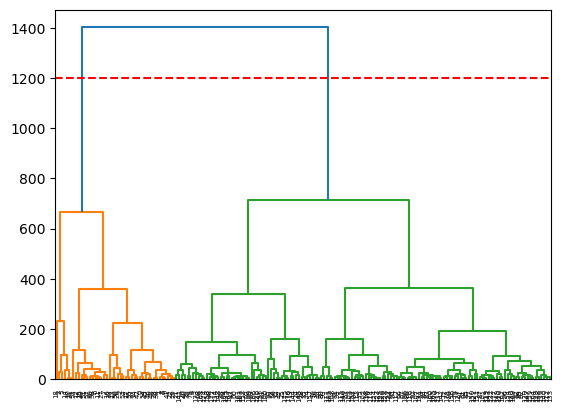

In [34]:
k = hierarchy.linkage(x,method='complete')
dendrogram = hierarchy.dendrogram(k)
plt.axhline(y=1200, c='red', linestyle='--')

# K-Mean clustering

In [35]:
sc = StandardScaler()
x =sc.fit_transform(x)
x

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [36]:
from sklearn.cluster import KMeans

In [37]:
km = KMeans()
y =km.fit_predict(x)
y

array([0, 0, 5, 0, 5, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 0, 0, 0, 5,
       0, 5, 5, 5, 5, 0, 5, 0, 5, 0, 5, 5, 5, 5, 5, 5, 3, 0, 0, 6, 0, 6,
       0, 5, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 5, 0, 3, 1, 1, 3, 6, 1, 5,
       3, 3, 1, 7, 1, 5, 3, 5, 6, 3, 3, 1, 7, 6, 3, 3, 1, 2, 6, 3, 1, 1,
       1, 1, 1, 1, 1, 6, 6, 7, 7, 3, 6, 6, 3, 3, 6, 3, 3, 1, 3, 1, 3, 6,
       7, 6, 1, 1, 1, 1, 3, 6, 2, 6, 6, 5, 6, 6, 6, 6, 6, 1, 6, 6, 4, 4,
       4, 4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 4, 4, 4, 4,
       4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4,
       4, 4])

In [38]:
km.cluster_centers_

array([[ 1.14912299, -0.39935034, -0.07650124, -1.11041937,  0.42290428,
         1.04039292,  1.09771452, -0.81834929,  0.80953698,  0.39751838,
         0.38153318,  0.87001063,  1.30729361],
       [-1.08386615, -0.62794242,  0.07753131,  0.45058085, -0.62654111,
        -0.61634935, -0.43188515,  1.10582894, -0.52481094, -0.85467919,
         0.61664292, -0.25854629, -0.67419376],
       [ 0.05240673,  1.34938241,  0.1382851 ,  0.49111339, -0.43671532,
        -1.05110053, -1.37950276,  1.21475264, -1.10005548,  0.25472603,
        -0.96737711, -1.09794486, -0.42250547],
       [-0.60214236, -0.83154874, -1.57060769, -0.45997232, -0.80963331,
        -0.24095144, -0.04999351, -0.49416604, -0.3160279 , -0.76983132,
         0.69469137,  0.35890748, -0.69907547],
       [ 0.31755491,  0.58744954,  0.30937706,  0.64828597,  0.27739428,
        -0.95603243, -1.08355083,  0.2236964 , -0.46789884,  1.60349803,
        -1.39782052, -1.44850467, -0.37653267],
       [ 0.49096711, -0.321261

# elbow graph

In [39]:
wcss = []

for i in range(1,20):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [40]:
wcss

[2314.0,
 1658.7588524290954,
 1277.928488844642,
 1181.0018383536296,
 1105.5185540425439,
 1048.5516499235077,
 1002.8792732756762,
 932.24162998675,
 913.6615596927038,
 864.0729431349348,
 823.6624026977069,
 801.9217050884099,
 775.1505617531136,
 753.487868437855,
 718.5534149008542,
 712.3231103445912,
 681.3214893236508,
 663.6191403603428,
 644.6161286806976]

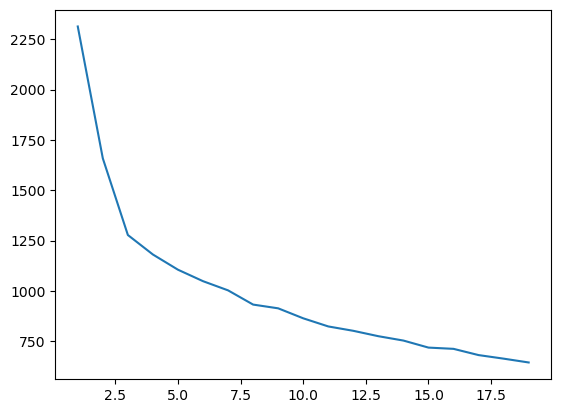

In [41]:
plt.plot(range(1,20),wcss)

In [42]:
km = KMeans(n_clusters=3)
ypred = km.fit_predict(x)
ypred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

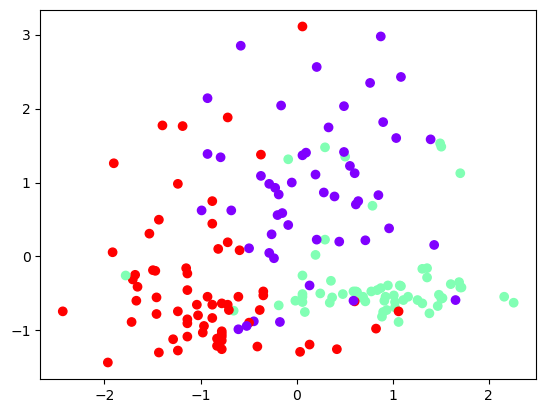

In [43]:
plt.scatter(x[:,0],x[:,1],c=ypred, cmap='rainbow')

In [44]:
km.cluster_centers_

array([[ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618]])

In [45]:
from sklearn.metrics import silhouette_score

In [46]:
silhouette_score(x,ypred)

0.2848589191898987

from "hierarchical, k-mean clustering we conclude that there is only 3 cluster in the data.which are clearly shown in k_means 
and the in PCA and t-SNE only 3 features giving 99% of information.